In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [3]:
df = pd.read_csv("Real estate.csv")

df.head(7)

,No,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3


In [4]:
cdf = df[['house_age','house_price']]
cdf.head(7)

,house_age,house_price
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1
5,7.1,32.1
6,34.5,40.3


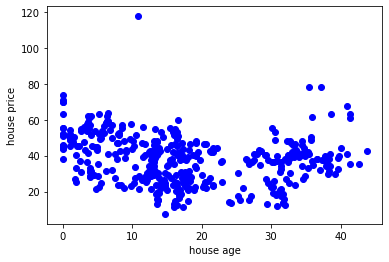

In [6]:
plt.scatter(cdf.house_age, cdf.house_price,  color='blue')
plt.xlabel("house age")
plt.ylabel("house price")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

In [10]:
train_x = np.asanyarray(train[['house_age']])
train_y = np.asanyarray(train[['house_price']])

test_x = np.asanyarray(test[['house_age']])
test_y = np.asanyarray(test[['house_price']])


poly = PolynomialFeatures(degree=2)            # From graph we can see dataset will fit to polynomial regression
train_x_poly = poly.fit_transform(train_x)


In [11]:
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         -1.90131047  0.04203933]]
Intercept:  [52.61309996]


Text(0, 0.5, 'house price')

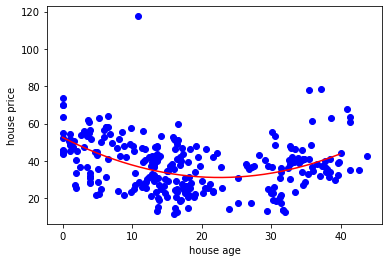

In [14]:
plt.scatter(train.house_age, train.house_price,  color='blue')
XX = np.arange(0.0, 40.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)   # better fit to data points
plt.plot(XX, yy, '-r' )
plt.xlabel("house age")
plt.ylabel("house price")

In [15]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

Mean absolute error: 9.71
Residual sum of squares (MSE): 129.24
